In [101]:
import numpy as np
import pandas as pd
import math

In [102]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
df = pd.read_excel('/content/gdrive/MyDrive/Internship/Shack Labs/DS - Assignment Part 1 data set.xlsx')

In [104]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [105]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


# Checking for Null values

In [106]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [107]:
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

Transaction date must be in date-time format

In [108]:
# Typecasting "Number of bedrooms" , "Number of convenience stores" as category type
df['Number of bedrooms'] = df['Number of bedrooms'].astype('category')
df['Number of convenience stores'] = df['Number of convenience stores'].astype('category')

# Converting Transaction date to a proper datetime format

In [109]:
from datetime import datetime, date, timedelta

## Extracting the day of year 

In [110]:
year = []
day_of_year=[]
for date in list(df['Transaction date']):
  
  year.append(int(math.modf(date)[1]))
  day_of_year.append(int(round(math.modf(date)[0],4)*365))
  


## Instantiating the year and the day of year to the dataframe

In [111]:
df['day_of_year'] = pd.Series(day_of_year)
df['year'] = pd.Series(year)

In [112]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,day_of_year,year
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,334,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,334,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,212,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,182,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,304,2012


In [113]:
#Typecastying as int
df[["day_of_year"]] = df[["day_of_year"]].astype(int)
df["day_of_year"] = df["day_of_year"] +1 
df[["day_of_year"]] = df[["day_of_year"]].astype(str)
df[["year"]] = df[["year"]].astype(str)


In [114]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,day_of_year,year
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,335,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,335,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,213,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,183,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,305,2012
...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,1,2013
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,244,2012
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,92,2013
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,1,2013




## **Extracting the proper date from month**

In [115]:
final_dates = []
for day_num, year in zip(df["day_of_year"], df["year"]):
  day_num.rjust(3 + len(day_num), '0')
  # converting to date
  res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
  final_dates.append(res)

In [116]:
df["corrected_date"] = pd.to_datetime(final_dates)   #Appending a new date column


## Dropping the redundant date columns

In [117]:
df.drop(axis=0, columns=['Transaction date','day_of_year','year'],inplace=True)

In [118]:
df.dtypes

House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
corrected_date                              datetime64[ns]
dtype: object

In [119]:
dd = pd.DatetimeIndex(df["corrected_date"])

In [120]:
df['day_of_year'] = dd.dayofyear

df['week_of_year'] = dd.weekofyear

df['month_of_year'] = dd.month

df['day_of_week'] = dd.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,corrected_date,day_of_year,week_of_year,month_of_year,day_of_week
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012-11-30,335,48,11,4
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012-11-30,335,48,11,4
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013-08-01,213,31,8,3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013-07-02,183,27,7,1
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012-10-31,305,44,10,2


# **Univariate Analysis**

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

## Segregating on the basis of datatypes

In [123]:
df.dtypes[df.dtypes == 'float64']

House Age                                   float64
Distance from nearest Metro station (km)    float64
latitude                                    float64
longitude                                   float64
House price of unit area                    float64
dtype: object

In [124]:
df.dtypes[df.dtypes == 'category']

Number of convenience stores    category
Number of bedrooms              category
dtype: object

In [125]:
df.dtypes[df.dtypes == 'int64']

House size (sqft)    int64
day_of_year          int64
week_of_year         int64
month_of_year        int64
day_of_week          int64
dtype: object

In [126]:
df.dtypes

House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
corrected_date                              datetime64[ns]
day_of_year                                          int64
week_of_year                                         int64
month_of_year                                        int64
day_of_week                                          int64
dtype: object

In [127]:
Continuous_grp = ['House Age','Distance from nearest Metro station (km)','latitude','longitude', 'House price of unit area', 'House size (sqft)']
Categorical_grp = list(df.dtypes[df.dtypes == 'int64'].keys())
date_time_grp = ['day_of_year','week_of_year','month_of_year','day_of_week']

## Plotting Continuous KDE plots

In [128]:
def Kde_plots(data, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
  
    #looping for each variable
    for j,i in enumerate(var_group):

    #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.kdeplot(data[i], shade=True)
      plt.xlabel('{}'.format(i), fontsize = 20)
      plt.ylabel('density')

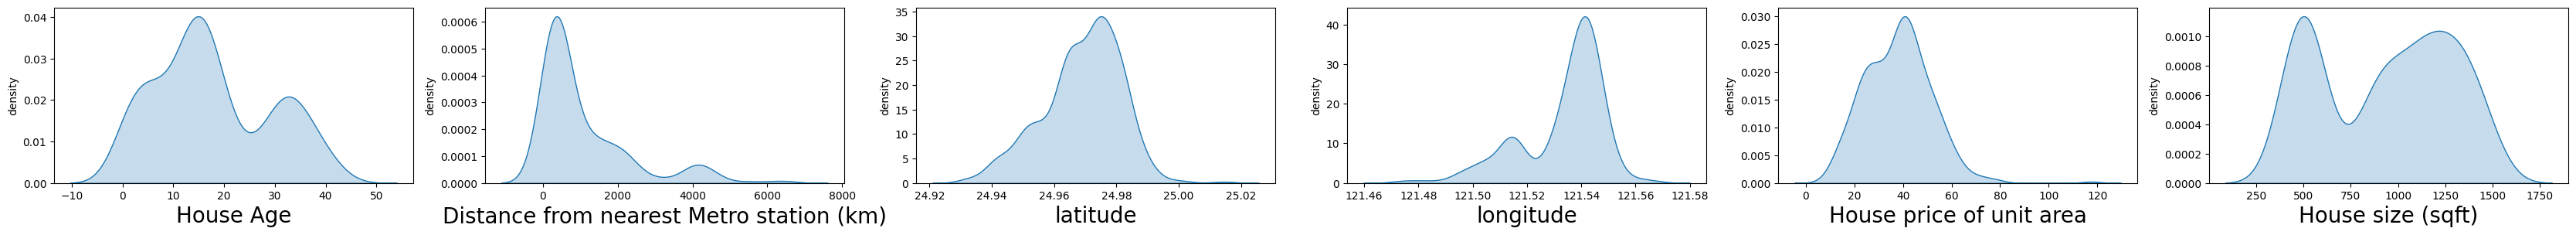

In [129]:
Kde_plots(df,Continuous_grp)

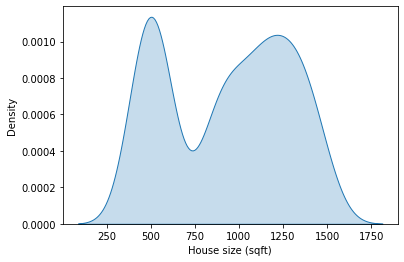

In [130]:
sns.kdeplot(df['House size (sqft)'],shade=True)

These variables have a good distribution

# CATEGORICAL VARIABLES

In [131]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,corrected_date,day_of_year,week_of_year,month_of_year,day_of_week
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012-11-30,335,48,11,4
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012-11-30,335,48,11,4
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013-08-01,213,31,8,3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013-07-02,183,27,7,1
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012-10-31,305,44,10,2


# Correlation Heatmap

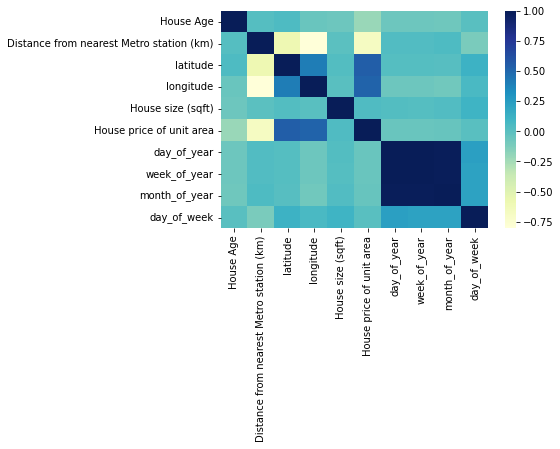

In [213]:
sns.heatmap(df.corr(),cmap = "YlGnBu")

# Model Building

In [132]:
from sklearn.model_selection import train_test_split

In [172]:
X = df.drop(['House price of unit area','corrected_date'],axis=1)
y = df['House price of unit area']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [174]:
X_train.shape , X_test.shape

((331, 11), (83, 11))

In [142]:
# Normalize

In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)

X_test = pd.DataFrame(X_test_scaled)


In [198]:
from sklearn.metrics import mean_squared_error as MSE

## Linear Regression Model

In [194]:
from sklearn.linear_model import LinearRegression as LR


In [195]:
# Creating instance of Linear Regresssion
lr = LR(normalize = False)
# Fitting the model
lr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [196]:
X_train.shape,y_train.shape

((331, 11), (331,))

In [199]:
test_predict_lr = lr.predict(X_test)
error_lr_test = np.sqrt(MSE(y_test,test_predict_lr))
train_predict_lr = lr.predict(X_train)
error_lr_train = np.sqrt(MSE( y_train, train_predict_lr))
print('Test RMSLE Score ', error_lr_test)
print('Train RMSLE Score ', error_lr_train)


Test RMSLE Score  8.235782051187334
Train RMSLE Score  9.042395536246229


## Decision Tree Model

In [182]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)
dt.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [200]:
test_predict_dt = dt.predict(X_test)
error_dt_test = np.sqrt(MSE(test_predict_dt, y_test))

train_predict_dt = dt.predict(X_train)
error_dt_train = np.sqrt(MSE(train_predict_dt, y_train))

print('Test RMSE Score ', error_dt_test)
print('Train RMSE Score ', error_dt_train)


Test RMSE Score  6.781534070206594
Train RMSE Score  8.41881938049393


##  KNN model

In [184]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [185]:
def Elbow(K):
  #initiating empty list
  test_error = []
  #training model for evey value of K

  for i in K:
    #Instance oh KNN
    clf = KNN(n_neighbors = i)
    clf.fit(X_train, y_train)
    # Appending errors to empty list calculated using the predictions
    pred = clf.predict(X_test)
    pred = np.sqrt(MSE(y_test,pred))

    test_error.append(pred)

  return test_error

In [188]:
curve = Elbow(range(1, 20, 1))

Text(0.5, 1.0, 'Elbow Curve for test')

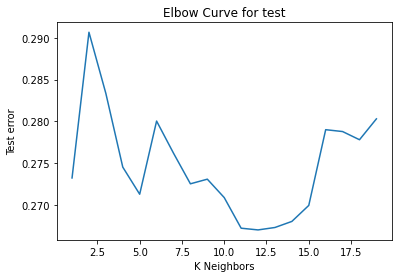

In [189]:
 # plotting the Curves
plt.plot(range(1, 20, 1) , curve)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')


##  From this elbow curve, we can see that k=11 is the optimal value for this model

In [191]:
from sklearn.neighbors import KNeighborsRegressor as KNN

# Creating instance of KNN
clf = KNN(n_neighbors = 11 )
# Fitting the model
clf.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=11)

In [201]:
test_predict_2 = clf.predict(X_test)

error_knn_test = np.sqrt(MSE( y_test, test_predict_2))

train_predict_2 = clf.predict(X_train)

error_knn_train = np.sqrt(MSE( y_train, train_predict_2))
print('Test RMSE Score ', error_knn_test)
print('Train RMSE Score ', error_knn_train)


Test RMSE Score  8.896551964749914
Train RMSE Score  9.653763666571407


# Creating a DataFrame for error values

In [207]:
error_df_key_train = {'Model':['KNN','Linear Regression','DecisionTree'],
'error': [error_knn_train,error_lr_train,error_dt_train]}
error_df_key_test = {'Model':['KNN','Linear Regression','DecisionTree'],
'error':[error_knn_test,error_lr_test,error_dt_test]}

In [208]:
train_error_df = pd.DataFrame(error_df_key_train)
test_error_df = pd.DataFrame(error_df_key_test)

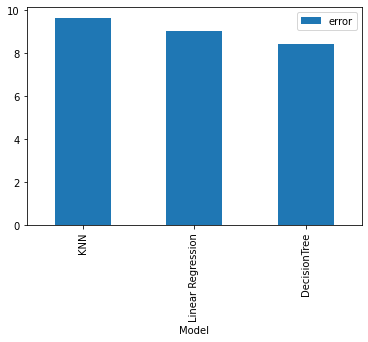

In [210]:
train_error_df.plot.bar(x='Model',y='error')


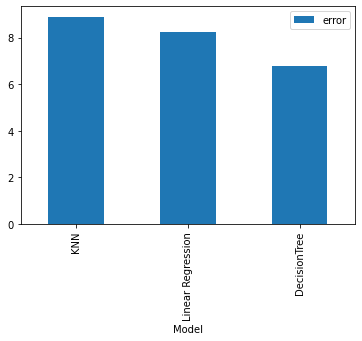

In [211]:
test_error_df.plot.bar(x='Model',y='error')

### Decision Tree has the lowest error among all the models thus we use its results